# Finding the dominant set in a network

These functions are helpful to prioritize call-ins for focussed deterrence interventions. It identifies the smallest set to call in the reach the entire network.

In [1]:
from crimepy import data, domset
from crimepy.cdcplot import plt
import networkx as nx

G, g1_nodes, g1_edges = data.load_network_data() # nx graph, nodes, and edges DF
g1_nodes

,Id,TotalInc,Attended,impact,Prob_or_Par
0,1,2,0,0,0
1,2,2,0,1,1
2,3,5,0,1,0
3,4,5,1,1,0
4,5,4,1,1,1
5,6,4,0,1,0
6,7,4,0,1,1
7,8,11,0,1,0
8,9,7,0,1,0
9,10,7,0,1,0


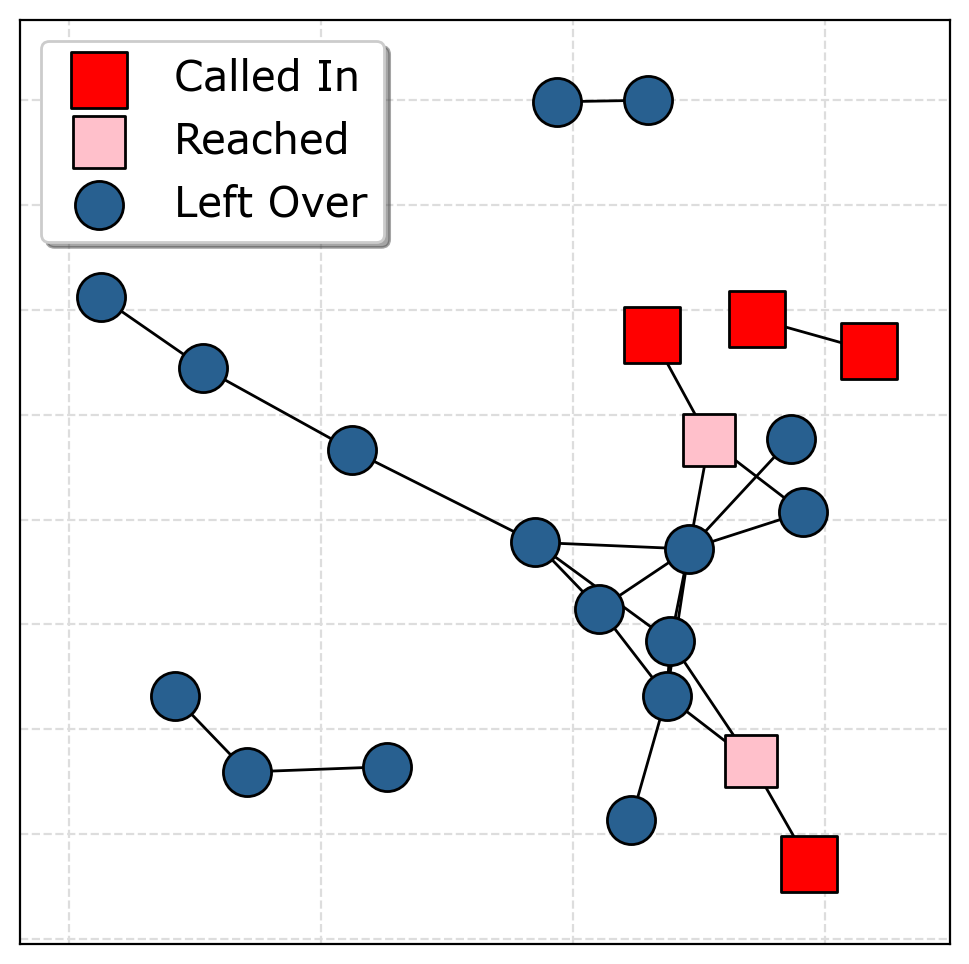

In [2]:
# Graph of actually called in
pos = nx.spring_layout(G,iterations=19)
fig, ax = plt.subplots(figsize=(6,6))
called_in = g1_nodes.loc[g1_nodes['Attended'] == 1,'Id'].values
domset.color(G,called_in,pos,ax=ax)
leg = ax.legend(prop={'size': 15})

[21, 16, 17, 2, 4, 11, 1, 5]


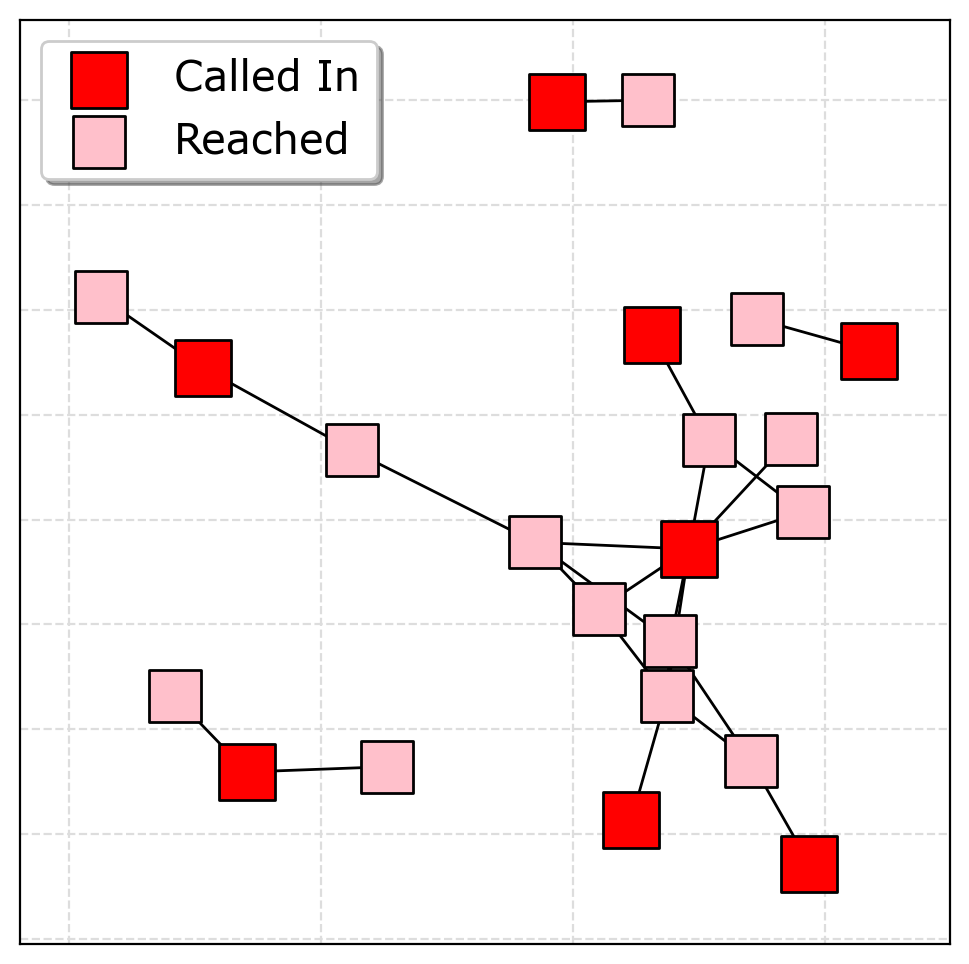

In [3]:
# dominant set
sugg_callin = domset.domSet_Whe2(G)
print(sugg_callin)
# Graph of suggested call ins
fig, ax = plt.subplots(figsize=(6,6))
domset.color(G,sugg_callin,pos,ax=ax)
leg = ax.legend(prop={'size': 15})

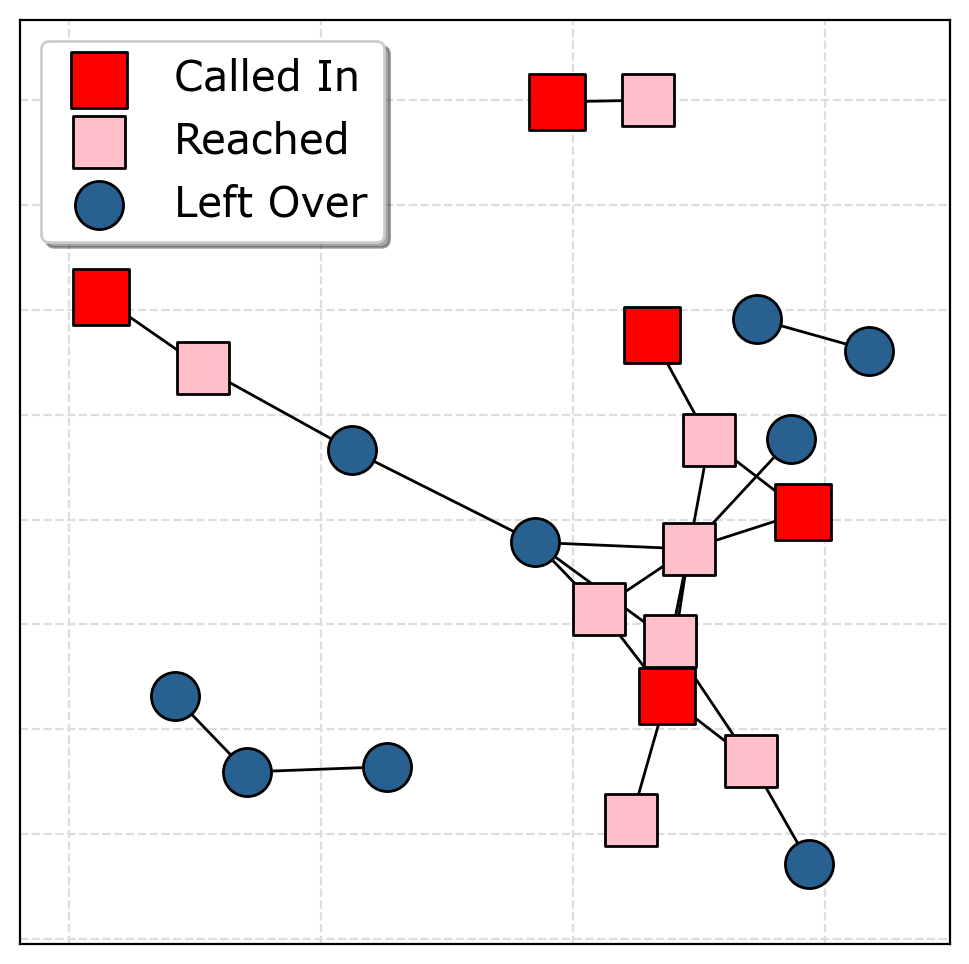

In [4]:
# subsetting to only look among those on parole
pp = g1_nodes.loc[g1_nodes['Prob_or_Par'] == 1,'Id'].values
#domset.domSet_WheSub(G,pp) # this just gives the same list back, but in preferred order
fig, ax = plt.subplots(figsize=(6,6))
domset.color(G,pp,pos,ax=ax)
ax.legend(prop={'size': 15})